# Обработка датасета 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/kaggle/input/mai-ml-contest-1/train.csv')

## Обработка на дубли
Просто удалим

In [3]:
data = data.drop_duplicates()

## Обработка на выбросы

count    1.000000e+04
mean    -2.995269e+04
std      1.455787e+06
min     -9.999999e+06
25%      3.253485e+01
50%      4.409630e+01
75%      6.530486e+01
max      1.000000e+07
Name: RiskScore, dtype: float64

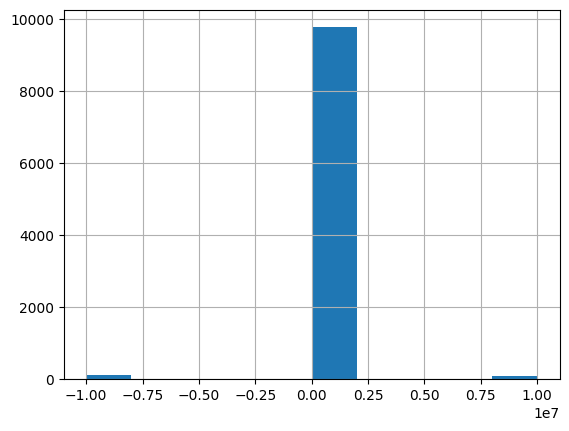

In [4]:
data['RiskScore'].hist()
data['RiskScore'].describe()

Можно предположить, что оценка риска должна быть в пределах от 0 до 100. 
Из описания таргета становится понятно, что выбросы у нас присутствуют (это любые отрицательные и максимум порядка 10^7). 
Моим решением было просто удалить их

count    9788.000000
mean       48.325333
std        17.233659
min        14.841417
25%        32.717486
50%        44.180868
75%        65.090711
max        97.597249
Name: RiskScore, dtype: float64

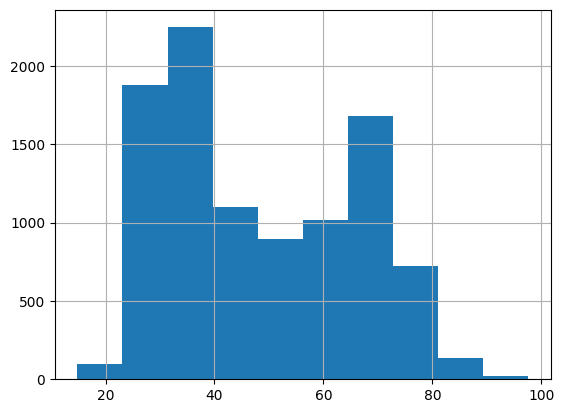

In [5]:
data = data[data['RiskScore'] >= 0]
data = data[data['RiskScore'] <= 100]
data['RiskScore'].hist()
data['RiskScore'].describe()

## Обработка на пропуски

In [6]:
# это чтобы не забыть, что можно попробовать что-то кроме удаления 
# data_train =  data[data['CreditScore'].isnull()]
# data_with_null.head()
# там пропуски для всех признаков в одних и тех же записях

data = data.dropna()
print(data.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

## Обработка категориальных признаков

In [7]:
# посмотрим, какие признаки у нас не являются численными
data.select_dtypes(include=['object'])

,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
0,2010-06-26,Divorced,Rent,Education,Employed,Associate
1,1996-09-23,Widowed,Mortgage,Home,Employed,High School
2,2015-01-19,Married,Mortgage,Education,Employed,Bachelor
3,1981-05-12,Married,Other,Debt Consolidation,Employed,High School
4,1995-05-07,Single,Rent,Debt Consolidation,Employed,Bachelor
...,...,...,...,...,...,...
9994,1986-11-30,Married,Mortgage,Debt Consolidation,Employed,Doctorate
9995,1995-06-09,Single,Other,Education,Employed,High School
9996,2000-03-10,Married,Mortgage,Auto,Employed,High School
9997,2010-04-05,Divorced,Mortgage,Education,Employed,High School


Одним из вариантов обработки даты является разбить ее на 3 колонки (хочу попробовать позже), другим - представить большим числом (скажем, 20241510), и третий вариант - просто удалить, что я и сделал

In [8]:
data = data.drop(columns=['ApplicationDate'])

Другие попробуем просто one-hot сделать, так как признаков можно и побольше для начала

In [9]:
data = pd.get_dummies(data, columns=['MaritalStatus'], drop_first=True)
data = pd.get_dummies(data, columns=['LoanPurpose'], drop_first=True)
data = pd.get_dummies(data, columns=['EmploymentStatus'], drop_first=True)
data = pd.get_dummies(data, columns=['EducationLevel'], drop_first=True)
data = pd.get_dummies(data, columns=['HomeOwnershipStatus'], drop_first=True)

## Нормализация
Сначала решил попробовать с MinMax, так как особой разницы, что тут использовать, не вижу

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = data['RiskScore']
X = data.drop(columns=['RiskScore'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Other,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent
0,0.145161,0.070659,0.452727,0.038827,0.444444,0.166667,0.099577,0.162808,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.596774,0.214240,1.000000,0.036003,0.222222,0.166667,0.018222,0.188832,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.532258,0.388544,1.000000,0.089423,0.222222,0.000000,0.049052,0.484029,0.250000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.112903,0.026834,0.994545,0.043363,0.333333,0.000000,0.012884,0.202839,0.583333,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.596774,0.388544,1.000000,0.070284,0.333333,0.333333,0.050525,0.296124,0.250000,0.166667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,0.209677,0.388544,1.000000,0.032158,0.444444,0.333333,0.015829,0.057914,0.333333,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9328,0.145161,0.000000,0.110909,0.044127,0.222222,0.166667,0.056046,0.445395,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9329,0.500000,0.231875,0.496364,0.015275,0.666667,0.000000,0.085864,0.100721,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9330,0.596774,0.384083,1.000000,0.103124,0.666667,0.333333,0.042886,0.406307,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Теперь проанализируем зависимости признаков и таргета 

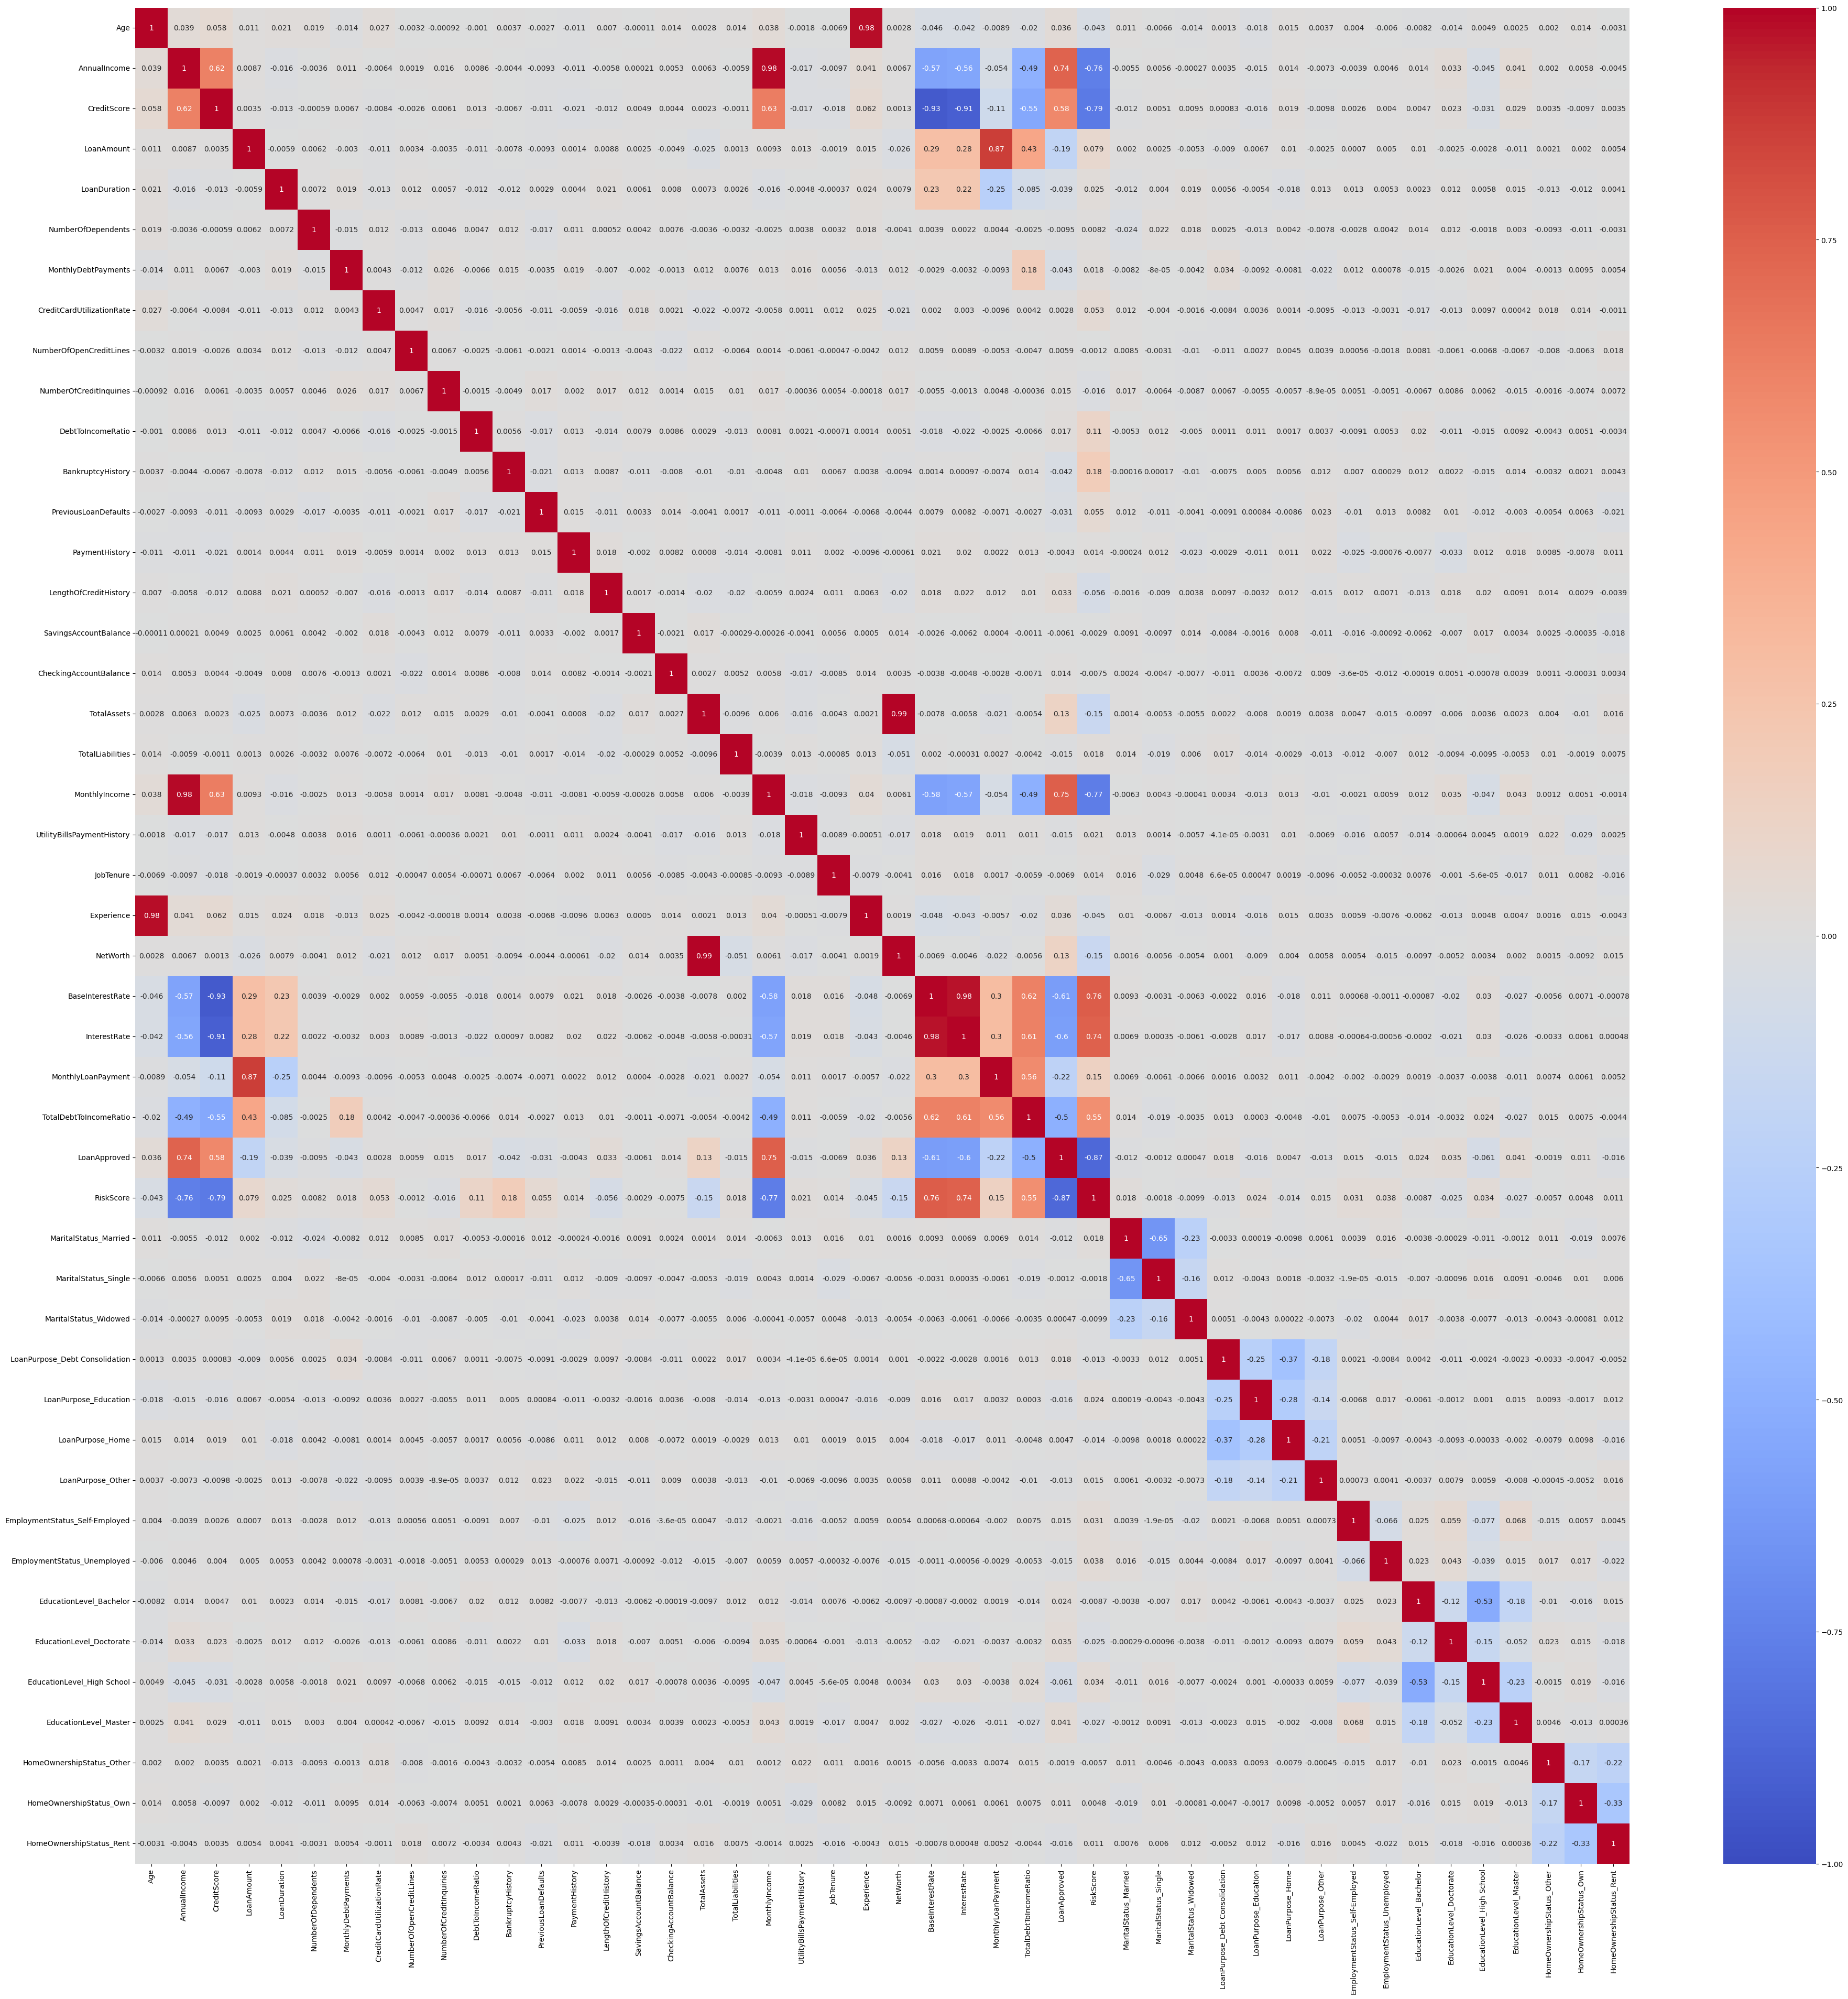

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix = data.corr()
plt.figure(figsize=(np.shape(data)[1], np.shape(data)[1]))
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

Отдельно выделим признаки с сильной корреляцией

In [12]:
print(matrix[(abs(matrix) >= 0.7) & (matrix != 1.)].stack())

Age                 Experience            0.982802
AnnualIncome        MonthlyIncome         0.984441
                    LoanApproved          0.741892
                    RiskScore            -0.757874
CreditScore         BaseInterestRate     -0.932614
                    InterestRate         -0.908585
                    RiskScore            -0.785429
LoanAmount          MonthlyLoanPayment    0.868404
TotalAssets         NetWorth              0.993819
MonthlyIncome       AnnualIncome          0.984441
                    LoanApproved          0.754705
                    RiskScore            -0.770341
Experience          Age                   0.982802
NetWorth            TotalAssets           0.993819
BaseInterestRate    CreditScore          -0.932614
                    InterestRate          0.975215
                    RiskScore             0.759546
InterestRate        CreditScore          -0.908585
                    BaseInterestRate      0.975215
                    RiskScore  

Можно заметить, что таргет у нас сильно зависит от 6 признаков, что не очень хорошо (трудно подобрать единственное решение и предсказания будут неточными). 
Теперь попробуем убрать сильнозависимые признаки, используя метод главных компонент (позволяет комбинировать признаки и существенно уменьшить их количество без сильных потерь в предсказаниях)

In [13]:
# all features (with encoded ones)
np.shape(data.drop(columns=['RiskScore']))[1]

45

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X = pca.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.595704,0.142207,0.282301,-0.247904,-0.684834,0.808019,-0.151748,0.372334,-0.355707,0.411023,...,-0.039525,-0.072638,-0.152754,-0.346123,-0.048943,-0.152558,-0.160429,0.039564,-0.191493,-0.102267
1,-0.506499,0.254574,-0.729304,0.713166,-0.021591,-0.234726,0.202923,-0.266483,-0.128377,0.911232,...,0.033768,0.024337,-0.035471,0.502275,-0.212719,0.066231,-0.165056,-0.114996,0.030374,0.018800
2,-0.916479,-0.691311,0.534534,-0.123754,0.161586,0.846251,0.194022,-0.329556,-0.358978,-0.187760,...,0.306924,-0.044038,-0.033942,0.110680,0.191924,-0.063029,-0.310226,-0.154652,0.050491,0.005484
3,-0.149765,-0.516489,-0.744284,-0.665248,0.293675,-0.455538,0.735764,-0.226712,-0.154448,-0.073894,...,0.450433,0.023109,-0.081725,0.004868,-0.159694,-0.132328,0.056609,-0.144085,-0.002239,0.341190
4,-1.001111,0.713211,0.744384,-0.757907,-0.554508,-0.465490,-0.216565,-0.279240,-0.118736,-0.271086,...,-0.159321,-0.034983,-0.071947,0.020556,0.013543,-0.067213,-0.257166,0.028517,0.015868,-0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,-0.866034,-0.610444,-0.084430,-0.652647,0.251651,-0.427209,0.252894,0.445974,-0.059163,-0.121770,...,-0.029937,-0.005422,-0.072986,-0.045374,-0.272910,0.014724,-0.242436,-0.122862,0.656172,0.123482
9328,0.978099,0.888457,-0.405631,-0.151470,0.185517,0.844419,0.777994,-0.183320,-0.282819,-0.233668,...,-0.080852,-0.040290,-0.111347,0.076524,0.090569,-0.149591,0.081461,-0.031734,0.029001,-0.078614
9329,-0.231830,-0.524409,-0.769042,-0.075874,0.098694,0.116821,0.202161,-0.215655,0.116937,-0.039255,...,0.052798,-0.071518,0.372565,0.004455,-0.216859,-0.003177,-0.273395,-0.132031,0.001153,-0.254864
9330,-0.697891,0.210213,-0.754566,-0.161709,0.056016,0.846455,0.214945,-0.236443,-0.379423,0.415127,...,0.486659,-0.026373,-0.081836,-0.279943,0.123703,-0.103150,0.095053,-0.178742,-0.005336,0.254908


Посмотрим на корреляционную матрицу после понижения размерности X

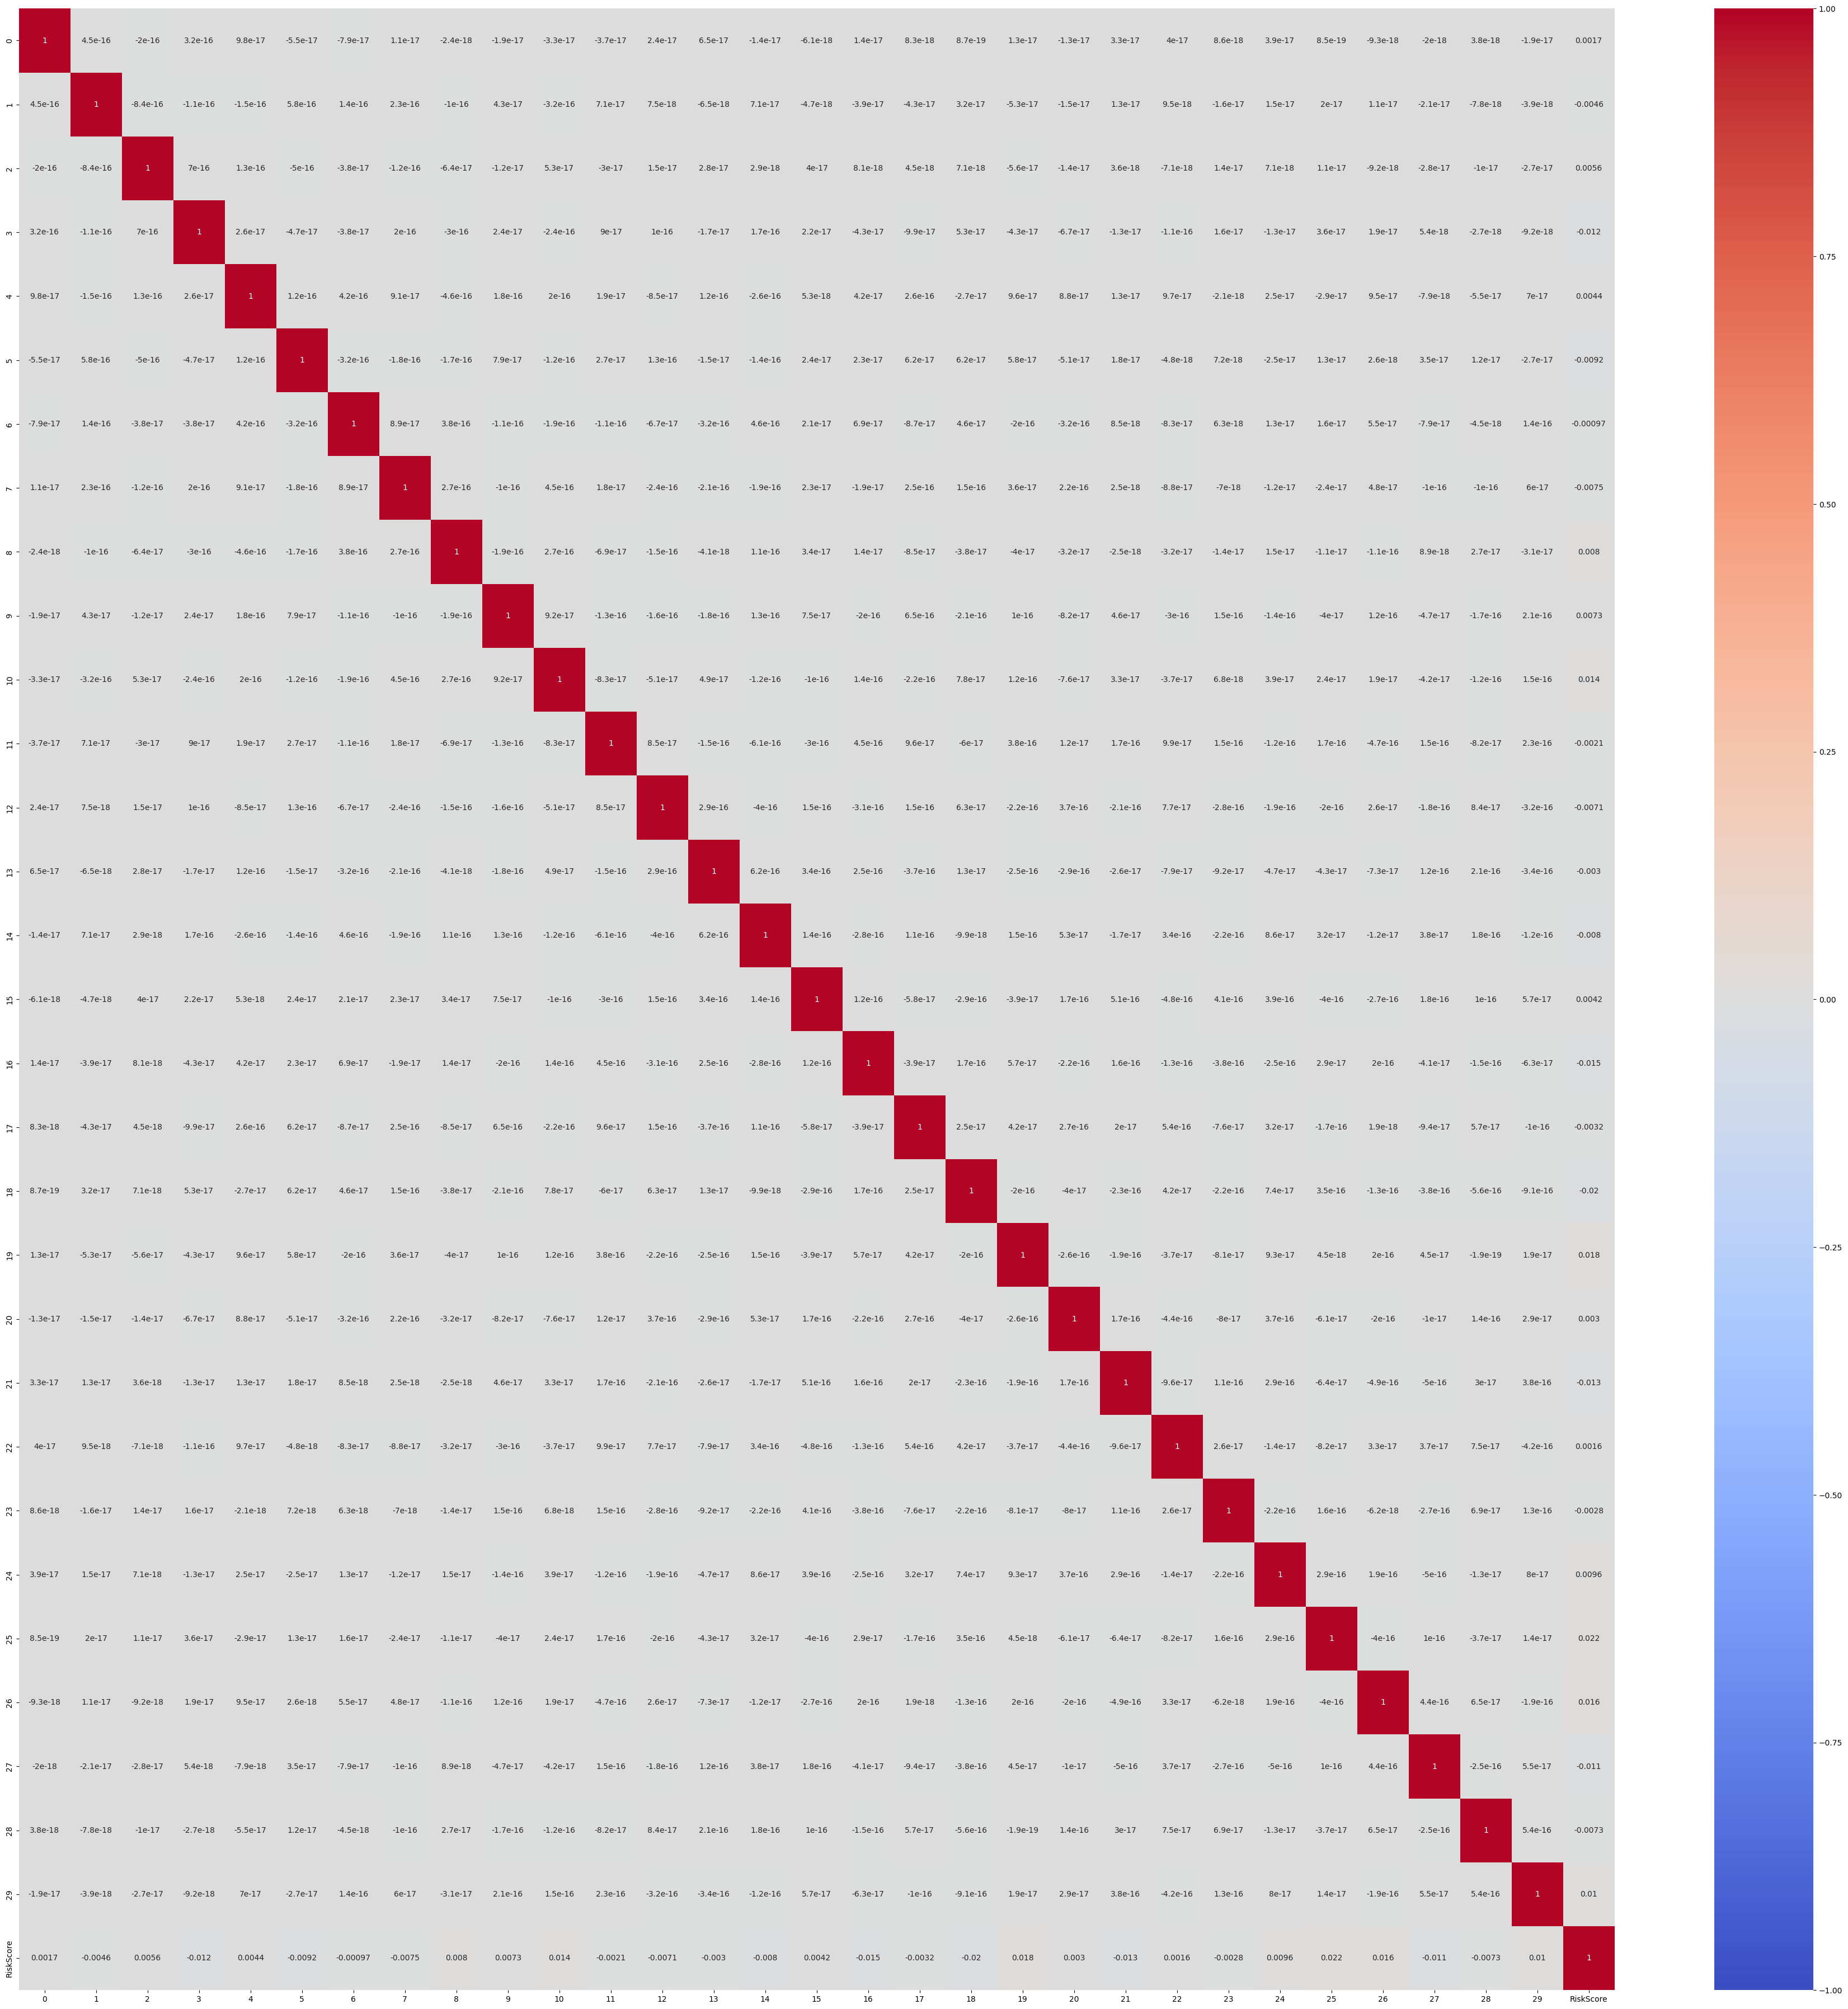

In [15]:
data_lowered = X.copy()
data_lowered['RiskScore'] = y
matrix = data_lowered.corr()
plt.figure(figsize=(np.shape(data)[1], np.shape(data)[1]))
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

В результате, зависимости как между признаками, так и признаками с таргетом, близки к 0

# Делим выборку на train и test 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print("Train", np.shape(X_train), np.shape(y_train))
print("Test", np.shape(X_test), np.shape(y_test))

Train (6532, 30) (6532,)
Test (2800, 30) (2800,)


# Обучение модели

In [17]:
# сначала попробуем Ridge, без подбора гиперпараметра alpha (пусть будет 1)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = Ridge(alpha=1).fit(X_train, y_train)

pred_train = reg.predict(X_train)
print("MSE on train", mean_squared_error(y_train, pred_train))
print("MAE on train", mean_absolute_error(y_train, pred_train))

pred_test = reg.predict(X_test)
print("MSE on test", mean_squared_error(y_test, pred_test))
print("MAE on test", mean_absolute_error(y_test, pred_test))

MSE on train 22.12775227859556
MAE on train 3.7045492906609776
MSE on test 21.677912833756164
MAE on test 3.6977715434154326


# Получим же наш submission.csv

In [18]:
X_to_predict = pd.read_csv('/kaggle/input/mai-ml-contest-1/test.csv')
id = X_to_predict['ID']

X_to_predict = X_to_predict.drop(columns=['ID', 'ApplicationDate'])

X_to_predict = pd.get_dummies(X_to_predict, columns=['MaritalStatus'], drop_first=True)
X_to_predict = pd.get_dummies(X_to_predict, columns=['LoanPurpose'], drop_first=True)
X_to_predict = pd.get_dummies(X_to_predict, columns=['EmploymentStatus'], drop_first=True)
X_to_predict = pd.get_dummies(X_to_predict, columns=['EducationLevel'], drop_first=True)
X_to_predict = pd.get_dummies(X_to_predict, columns=['HomeOwnershipStatus'], drop_first=True)

X_to_predict = pd.DataFrame(scaler.fit_transform(X_to_predict), columns=X_to_predict.columns)

X_to_predict = pca.fit_transform(X_to_predict)
X_to_predict = pd.DataFrame(X_to_predict)

y = pd.DataFrame({
    'ID' : id,
    'RiskScore' : reg.predict(X_to_predict)
})
y.to_csv('submission.csv', index=False)

In [19]:
y['RiskScore'].describe()

count    5000.000000
mean       48.261597
std        16.557965
min        21.049526
25%        32.535558
50%        45.431186
75%        63.943945
max        86.903055
Name: RiskScore, dtype: float64